In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
#Sprendimu medis 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

NameError: name 'X_train' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

X = dataset[:, 1:2].astype(int) # 1 stulpelis, visos eilutės kaip X -  features set'as
y = dataset[:, 2].astype(int)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y_pred = regressor.predict([[3750]])
print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



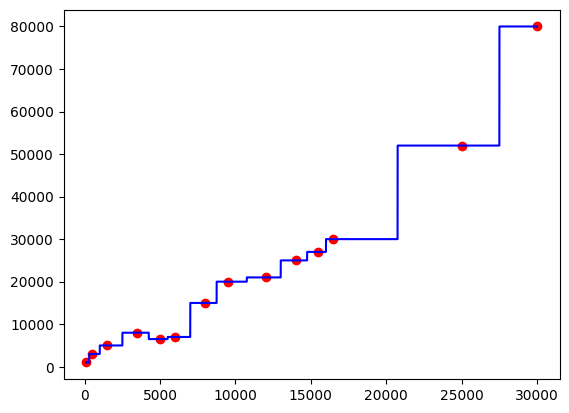

In [7]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()

In [10]:
y_p = regressor.predict(X)
accuracy_score(y, y_p)

1.0

In [13]:
from sklearn.tree import export_graphviz
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])

In [14]:
# Uzduotis. # Sprendžiama problema: Savaitgalio veiklos pasirinkimas
# Sprendimo taškai:
# • Orai: Ar bus saulėta, ar lietinga?
# • Energingumo lygis: Ar jaučiatės energingi, ar pavargę?
# • Kompanija: Ar draugai gali prisijungti?
# Sprendimų medžiui sukurti naudokite draw.io


Linear Regression Results:
Score: 60.11%

Decision Tree Regressor Results:
Score: 55.40%



[Text(0.5, 1.0, 'Decision Tree Predictions')]

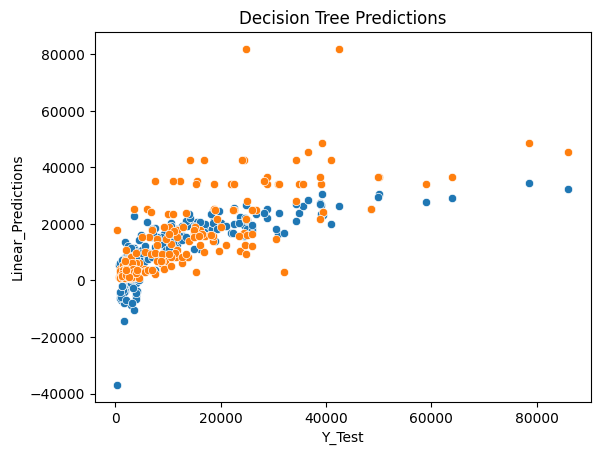

In [65]:
# Tiesinės regresijos ir sprendimų medžio (regresoriaus) palyginimas : 
# paimkite savo darytą automobilių bei butų (pardavimui)  kainos spėjimo algoritmą su linijine regresija,
# tuos pačius duomenis pateikite DecissionTreeRegressor(). 
# Abiem atvejais paskaičiuokite accuracy_score, patestuokite su 2-5 vartotojo įvestimis. 
# Kuris modelis davė tikslesnius rezultatus? 


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import sqlite3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Prisijungimas prie duomenu bazes
db_path = "AutopliusDuombaze10.db"
connection = sqlite3.connect(db_path)
query = """
SELECT * FROM Autoplius;
"""
df_autoplius = pd.read_sql_query(query, connection)
connection.close()

# Sutvarkome DataFrame
df_autoplius = df_autoplius.drop(columns=['defektai', 'ta_galiojimas', 'miestas', 'salis', 'pavadinimas'])
df_autoplius = df_autoplius[df_autoplius['kaina'] != 0]
df_autoplius = df_autoplius[df_autoplius['amzius'] != 'Nėra']
df_autoplius = df_autoplius[df_autoplius['galia'] != 0]

# Stulpeliu encodinimas
encoder = LabelEncoder()
df_autoplius['keb_tipas'] = encoder.fit_transform(df_autoplius['keb_tipas'])
df_autoplius['pavaru_deze'] = encoder.fit_transform(df_autoplius['pavaru_deze'])
df_autoplius['kuras'] = encoder.fit_transform(df_autoplius['kuras'])
df_autoplius['gamintojas'] = encoder.fit_transform(df_autoplius['gamintojas'])

# Modelio duomenys
X = df_autoplius[['rida', 'amzius', 'galia', 'pavaru_deze', 'keb_tipas', 'kuras', 'gamintojas']]
y = df_autoplius['kaina']

# Train-test dalinimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

# Tiesinė regresija
linear_model = LinearRegression().fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test) * 100.0

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test) * 100.0

# Rezultatų palyginimas
print("Linear Regression Results:")
print(f"Score: {linear_score:.2f}%\n")

print("Decision Tree Regressor Results:")
print(f"Score: {tree_score:.2f}%\n")

# Scatter plot, palyginant sprendimų medį ir tiesinę regresiją
res_linear = pd.DataFrame({
    'Y_Test': y_test.reset_index(drop=True),
    'Linear_Predictions': linear_model.predict(X_test)
})
res_tree = pd.DataFrame({
    'Y_Test': y_test.reset_index(drop=True),
    'Tree_Predictions': tree_model.predict(X_test)
})

sns.scatterplot(x='Y_Test', y='Linear_Predictions', data=res_linear).set(title="Linear Regression Predictions")
sns.scatterplot(x='Y_Test', y='Tree_Predictions', data=res_tree).set(title="Decision Tree Predictions")


In [ ]:
# Antra - logistinės regresijos ir sprendimų medžio (classsifier) palyginimas - paimkite savo ankstesnį 
# kodą, skirtą nustatyti, ar eismo įvykis buv su gyvūnu, ar ne, atliktą su logistine regresija. 
# Pritaikykite DecisionTreeClassifier(). paskaičiuokite accuracy_score abiems atvejams. 
# Vizualizuokite comfusiom matrix abiems atvejams. Patestuokite su keliais konkrečiais atvejais. Kuris modelis spėdavo geriau?

# Abiems atvejais vizualizuokite sprendimų medžio algoritmą (gaukite iliustraciją)

In [71]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
print("Path to dataset files:", path)

# UŽDUOTIS _ Aptikti sukčiavimą (fraud)

# Stulpelių reikšmės:

# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction
print(path)

Path to dataset files: C:\Users\Pauliussl\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1
C:\Users\Pauliussl\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [87]:
df = pd.read_csv("C:\\Users\\Pauliussl\\Paskaita71\\onlinefraud.csv")
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


Decision Tree Accuracy: 99.97%
Logistic Regression Accuracy: 99.93%


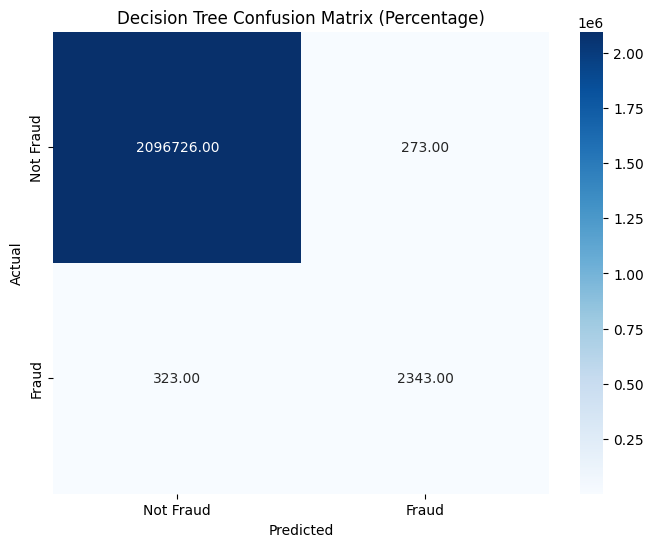

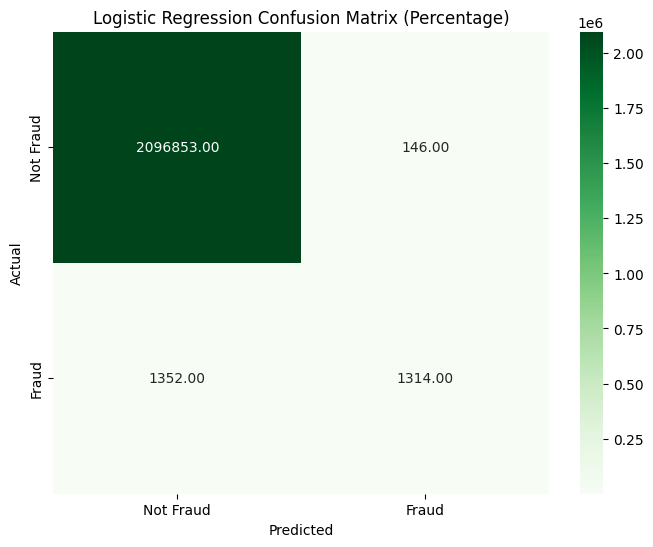

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Apskaičiuokite Decision Tree tikslumą
tree_score = tree_model.score(X_test, y_test) * 100.0
print(f"Decision Tree Accuracy: {tree_score:.2f}%")

# Logistic Regression modelis
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Apskaičiuokite Logistic Regression tikslumą
log_score = log_model.score(X_test, y_test) * 100.0
print(f"Logistic Regression Accuracy: {log_score:.2f}%")

# Sukurkite painiavos matricą Decision Tree modeliui ir konvertuokite į procentus
cm_tree = confusion_matrix(y_test, y_pred_tree)
# cm_tree_percentage = (cm_tree / np.sum(cm_tree)) * 100

# Sukurkite painiavos matricą Logistic Regression modeliui ir konvertuokite į procentus
cm_log = confusion_matrix(y_test, y_pred_log)
# cm_log_percentage = (cm_log / np.sum(cm_log)) * 100

# Vizualizuokite Decision Tree painiavos matricą
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Decision Tree Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Vizualizuokite Logistic Regression painiavos matricą
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='.2f', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Logistic Regression Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


